### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [14]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
boot_diffs = [] 

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    boot_diff = (bootsamp[bootsamp['drinks_coffee']==True].height.mean() 
                - bootsamp[bootsamp['drinks_coffee']==False].height.mean())
    boot_diffs.append(boot_diff)

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

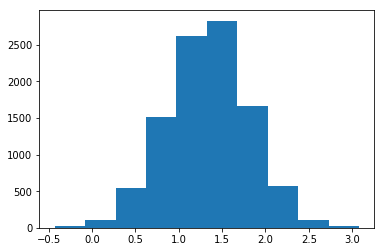

In [5]:
plt.hist(boot_diffs)

In [6]:
# build 99% confidence interval
np.percentile(boot_diffs,0.5), np.percentile(boot_diffs,99.5) 
# those who drinks coffee are on average taller than those who do not drink coffee

(0.10258900080919674, 2.5388333707966284)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [18]:
boot_diffs2 = [] 

for _ in range(10000):
    bootsamp2 = sample_data.sample(200, replace=True)
    boot_diff2 = (bootsamp2[bootsamp2['age']==">=21"].height.mean()
                - bootsamp2[bootsamp2['age']=="<21"].height.mean())
    boot_diffs2.append(boot_diff2)

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

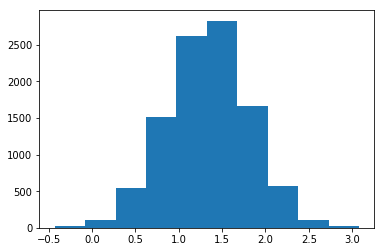

In [19]:
plt.hist(boot_diffs)

In [20]:
# build 99% confidence interval
np.percentile(boot_diffs2,0.5), np.percentile(boot_diffs2,99.5)
# those over 21 years old are taller than those under 21 years old 

(3.3846249718386421, 5.1051788925372721)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [24]:
boot_diffs3 = [] 

for _ in range(10000): 
    bootsamp3 = sample_data.sample(200,replace=True)
    under21_coff_mean = bootsamp3.query("drinks_coffee == True and age == '<21'")["height"].mean() 
    under21_noncoff_mean = bootsamp3.query("drinks_coffee == False and age == '<21'")["height"].mean()
    boot_diffs3.append(under21_noncoff_mean - under21_coff_mean)

(array([   24.,   152.,   686.,  1846.,  2828.,  2582.,  1382.,   413.,
           82.,     5.]),
 array([ 0.43260983,  0.72578965,  1.01896947,  1.31214928,  1.6053291 ,
         1.89850892,  2.19168874,  2.48486856,  2.77804838,  3.0712282 ,
         3.36440802]),
 <a list of 10 Patch objects>)

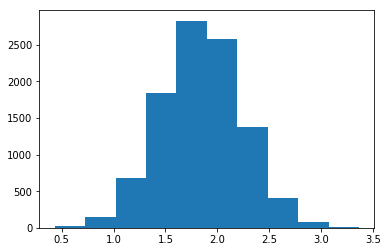

In [25]:
plt.hist(boot_diffs3)

In [26]:
# build 95% confidence interval
np.percentile(boot_diffs3,2.5), np.percentile(boot_diffs3,97.5)
# among those who are under 21 years old, non-coffee drinkers are on average taller than coffee drinkers

(1.0709727887518465, 2.6104831869381879)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [28]:
boot_diffs4 = [] 

for _ in range(10000):
    bootsamp4 = sample_data.sample(200, replace=True)
    over21_coff_mean = bootsamp4.query("drinks_coffee == True and age == '>=21'")["height"].mean()
    over21_noncoff_mean = bootsamp4.query("drinks_coffee == False and age == '>=21'")["height"].mean()
    boot_diffs4.append(over21_noncoff_mean - over21_coff_mean)

(array([  6.00000000e+00,   7.30000000e+01,   5.43000000e+02,
          2.17900000e+03,   3.74600000e+03,   2.58000000e+03,
          7.69000000e+02,   9.30000000e+01,   1.00000000e+01,
          1.00000000e+00]),
 array([ 0.24980976,  0.87504819,  1.50028662,  2.12552504,  2.75076347,
         3.3760019 ,  4.00124032,  4.62647875,  5.25171718,  5.87695561,
         6.50219403]),
 <a list of 10 Patch objects>)

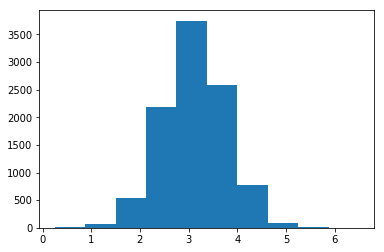

In [29]:
plt.hist(boot_diffs4)

In [30]:
# 95% confidence interval 
np.percentile(boot_diffs4,2.5), np.percentile(boot_diffs4,97.5)
# among those who are over 21 years old, non-coffee drinkers are on average taller than coffee drinkers.

(1.8112701857664477, 4.3801456069176377)